# <div align="center"> Examen Interciclo
###  <div align="center"> Eventos Discretos y Simulacion
    
    
    
    
### <div align="center"> MATERIA:
### <div align="center"> Simulacion
    
    
## <div align="center"> DOCENTE:
### <div align="center"> Ing. Diego Quisi

## <div align="center">ESTUDIANTE:
### <div align="center"> Andres Viscaino
#### <div align="center"> 

In [192]:
#Librerias a importar
import tweepy
import json
import tweepy
import simpy
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [218]:
# 4 cadenas para la autenticacion
consumer_key = "VBqtubp6y0xrLXloMx90Pj2Hw"
consumer_secret = "tukpLWPWUfi6PcOeQAonasqj7e4IaSarDnI3wRL6ScewynOLpx"
access_token = "471442308-b9aHvAilC9W86V0pitx8b5jilaEc9C4gdPYi7MXr"
access_token_secret = "oxaWXC3Y8LgyLYSdOQ6RgRpaLcrBXWNl7oSNLfWpDdM6G"

titulo=[]
cant_palabras=[]
shares=[]
likes=[]
urls=[]

In [219]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# con este objeto realizaremos todas las llamadas al API
api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

#Buscar Tweets
for tweet in tweepy.Cursor(api.search, q="@cnegobec", tweet_mode="extended").items(1000):
    #Imprimimos los datos para vericar usando JSON
    #print (json.dumps(tweet._json, indent=4))
    #print (tweet._json['full_text'])
    #print ('Cantidad de palabras: ',len(tweet._json['full_text']))
    #print ('Se compartio : ',tweet._json['retweet_count'])
    #print ('Cantidad de Urls: ',len(tweet._json['entities']['urls']))
    #print ('Hashtags: ',len(tweet._json['entities']['hashtags']))
    titulo.append(tweet._json['full_text'])
    cant_palabras.append(len(tweet._json['full_text']))
    shares.append(tweet._json['retweet_count'])
    likes.append(tweet._json['favorite_count'])
    urls.append(len(tweet._json['entities']['urls']))

In [220]:
data = {'title':titulo,
                    'links':urls,
                   'Cant_palabras':cant_palabras,
                  'likes':likes,
                  'shares':shares} 
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)
# select two columns
df=df=df.sort_values('shares',ascending=True)
df

title  links  Cant_palabras  \
174  #CNEInforma | El Colegio Juan Pío Montufar, es...      0            176   
555  @wgomezr @ecuarauz @cnegobec Mientras estaba s...      0             99   
696  @wgomezr @ecuarauz @cnegobec Es un miserable, ...      0            101   
549  @wgomezr @ecuarauz @cnegobec Señor Vera,al con...      0            200   
545  @DanielAcostag @TCE_Ecuador @FiscaliaEcuador @...      0             85   
..                                                 ...    ...            ...   
755  RT @ramiroaguilart: Ecuador lleva votando desd...      0            140   
994  RT @ramiroaguilart: Ecuador lleva votando desd...      0            140   
101  RT @Lenin: Veo con preocupación el tema electo...      0            140   
796  RT @Lenin: Veo con preocupación el tema electo...      0            140   
384  RT @UNESECUADOR: 🔴🔴🔴ATENCIÓN |\nAl @cnegobec y...      0            140   

     likes  shares  
174      0       0  
555      1       0  
696      2       0  
549      1       0  
545      0       0  
..     ...     ...  
755      0     540  
994      0     540  
101      0    1922  
796      0    1922  
384      0    2249  

[1000 rows x 5 columns]

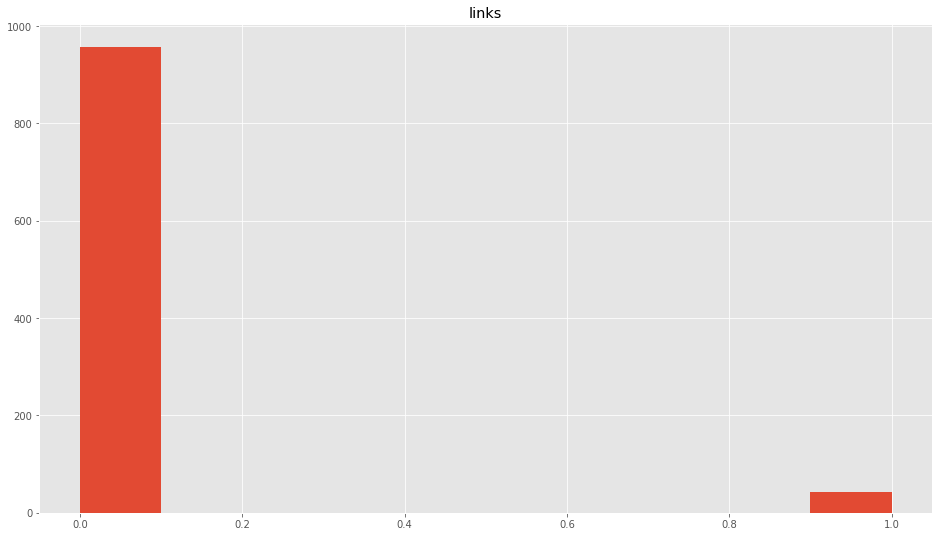

In [221]:

# Visualizamos rápidamente las caraterísticas de entrada
df.drop(['Cant_palabras','likes', 'shares'],1).hist()
plt.show()


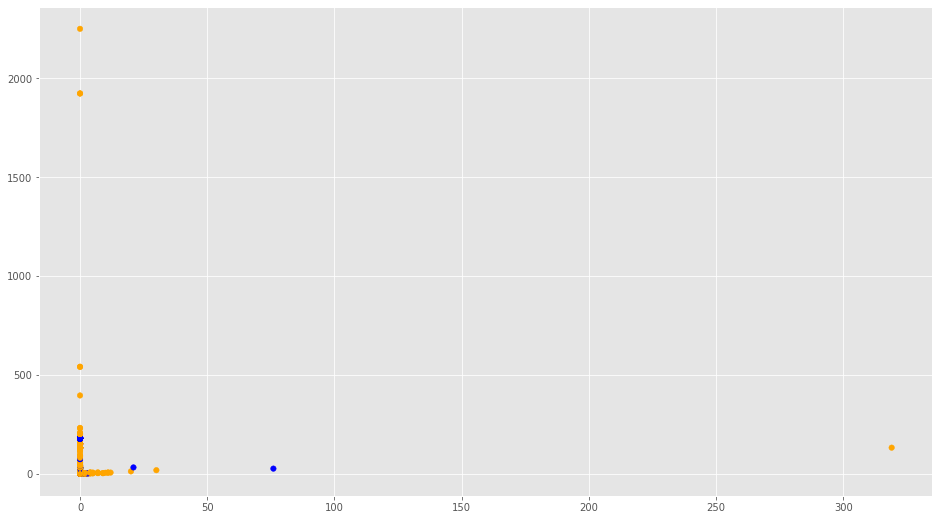

In [222]:
# y en el eje Y: entre 0 y 80.000
#filtered_data = df[(df['Cant_palabras'] <= 200) & (data['shares'] <= 200)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = df['likes'].values
f2 = df['shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in df.iterrows():
    if(row['Cant_palabras']>130):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [223]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df[["Cant_palabras"]]
X_train = np.array(dataX)
y_train = df['shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.42215685]
Independent term: 
 140.85103196262838
Mean squared error: 16833.19
Variance score: 0.03


In [224]:
print(len(X_train[:,0]))
print(len(y_train))

1000
1000


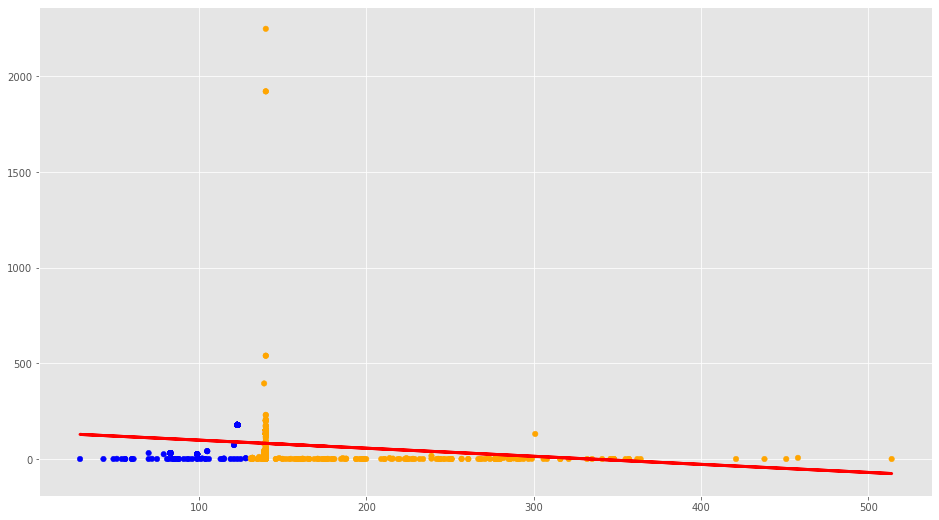

In [225]:
plt.scatter(X_train[:,0],y_train,c=asignar,s=tamanios[0])
plt.plot(X_train[:,0],y_pred,color='red',linewidth=3)

In [111]:
y_Dosmil = regr.predict([[123]])
print(int(y_Dosmil))

71


### Modelo polinomial


rediccon de retweet 425


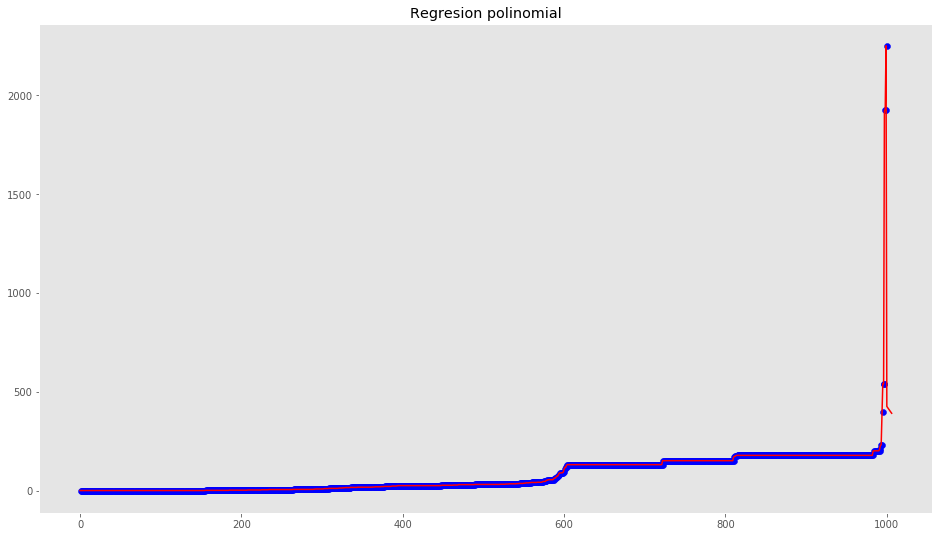

In [226]:
y=list(df.iloc[:,4])

y1=y[0:len(y)]
x1 = np.array(range(1,len(y)+1)).reshape(-1, 1)
lin = LinearRegression() 
lin.fit(x1, y1) 
poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(x1) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(x1, y1, color = 'blue') 
X1 =  np.array(range(len(y)-14,len(y)-7))
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
print('rediccon de retweet',int(pre[6]))
pre=np.flip(pre)
for i in pre:
    y1.append(i)
x2=np.array(range(0,len(y1))) 
plt.plot(x2, y1, color = 'r')
plt.plot()
plt.title('Regresion polinomial') 
plt.grid()
plt.show()

### Modelo Probabilistico

La prediccion para un tweet de 36 palabras es :  3365


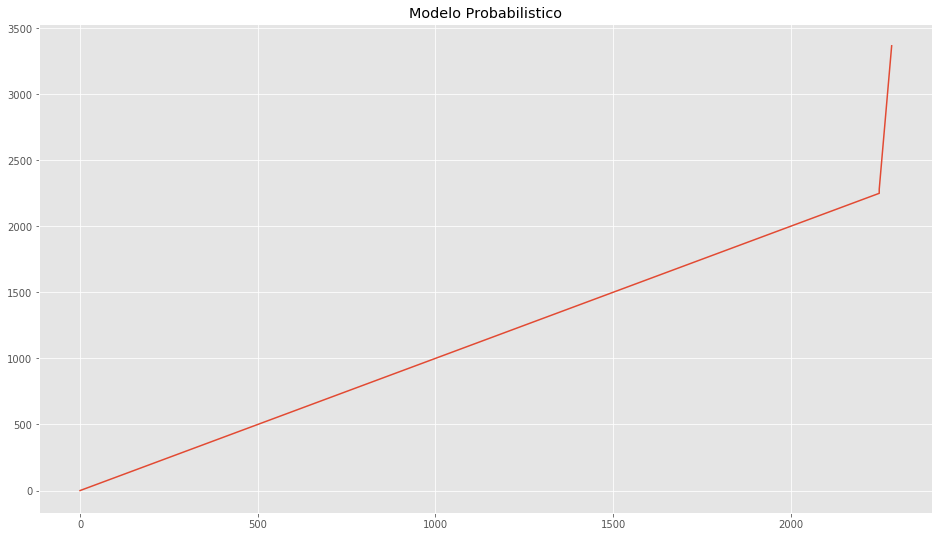

In [242]:
filtro=df.iloc [:, 4] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
y = list(df.iloc [:, 4]) # Total casos
x = y[0:len(y)] # Dias
for i in range(x[-1], x[-1]+36):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y)
plt.title('Modelo Probabilistico') 
print('La prediccion para un tweet de 36 palabras es : ',y[len(y)-1])
plt.show()

### Simulacion de eventos discretos

In [189]:
#PARAMETROS
MESA_A = 6
TASA_CRECIMIENTO = 7
NUMERO_CANDITADOS=5
#Diccionario para almacenar los resultados
lista_votos=[]
class Recinto(object):
    #constructor
    def __init__(self, env, num_mesas, name):
            self.env = env
            self.num_mesas = num_mesas
            self.mesas = simpy.Resource(env, num_mesas)
            self.name = name
            
    def ingresar_persona(self, persona):
        yield self.env.timeout(random.randint(1, 2))
        v=random.randint(1,NUMERO_CANDITADOS+1)
        lista_votos.append(v)
        print("La persona : ", persona, " termino de votar : ", self.env.now, " mesa ", self.name," y recibe su certificado")
def llegada_persona(env, recinto, persona):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 60):
        with recinto.mesas.request() as mesa:
            dias_esperando = random.randint(1,5) #Numero de dias maximo que puede esperar sin ser asignado a una mesa dentro del recinto
            requerimiento = yield mesa | env.timeout(dias_esperando) #Asignar un tiempo de espera
            wait = env.now - arrive
            if mesa in requerimiento:
                print("A la Persona: ", persona, " le toca pasar a votar en ", " mesa " , recinto.name)
                yield env.process(recinto.ingresar_persona(persona))
                estado = random.randint(1,100)
            else:
                print("El persona " , persona, " en el Mesa ", recinto.name, " espero ", wait , " minuto y voto")
                v=random.randint(1,NUMERO_CANDITADOS+1)
                lista_votos.append(v)
                       
    else :
        print("La persona voto : ", persona, " mesa ", recinto.name )
        v=random.randint(1,NUMERO_CANDITADOS+1)
        lista_votos.append(v)

def ejecutar(env, tasa_crecimiento, val=0):
    recintoA = Recinto(env, MESA_A, "A")
    recintoB = Recinto(env, MESA_A, "B")
    for i in range(val):
        asignar_recinto(env, recintoA, recintoB, i)
    persona = val
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            persona += 1
            asignar_recinto(env, recintoA, recintoB, persona)
                
def asignar_recinto(env, recintoA, recintoB, persona):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        print("Llega Persona : ", persona, " Mesa A ", env.now)
        env.process(llegada_persona(env, recintoA, persona))
    else:
        print("Llega Persona : ", persona, " Mesa B ", env.now)
        env.process(llegada_persona(env, recintoB, persona))
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, 0))
env.run(until=DIAS_SIMULACION)

Llega Persona :  1  Mesa A  1
Llega Persona :  2  Mesa A  1
Llega Persona :  3  Mesa A  1
Llega Persona :  4  Mesa B  1
Llega Persona :  5  Mesa A  1
Llega Persona :  6  Mesa A  1
Llega Persona :  7  Mesa B  1
La persona voto :  6  mesa  A
La persona voto :  7  mesa  B
A la Persona:  1  le toca pasar a votar en   mesa  A
A la Persona:  2  le toca pasar a votar en   mesa  A
A la Persona:  3  le toca pasar a votar en   mesa  A
A la Persona:  4  le toca pasar a votar en   mesa  B
A la Persona:  5  le toca pasar a votar en   mesa  A
Llega Persona :  8  Mesa A  2
Llega Persona :  9  Mesa B  2
Llega Persona :  10  Mesa A  2
Llega Persona :  11  Mesa B  2
Llega Persona :  12  Mesa A  2
Llega Persona :  13  Mesa B  2
Llega Persona :  14  Mesa A  2
La persona voto :  10  mesa  A
La persona voto :  11  mesa  B
La persona voto :  12  mesa  A
La persona voto :  13  mesa  B
La persona voto :  14  mesa  A
La persona :  1  termino de votar :  2  mesa  A  y recibe su certificado
La persona :  2  termi

127


Text(0.5, 0, 'Candidatos')

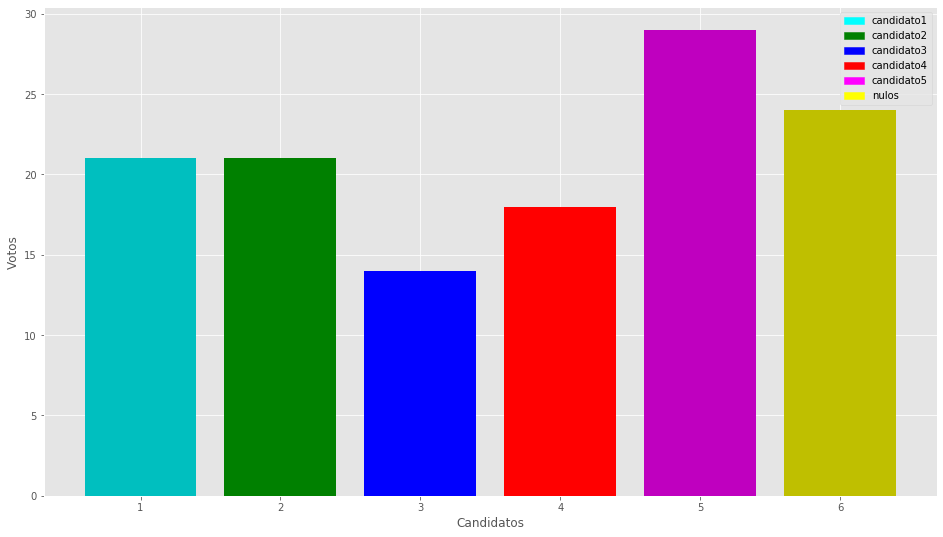

In [190]:
print(len(lista_votos))
plt.bar(1,lista_votos.count(1),color='c')
plt.bar(2,lista_votos.count(2),color='g')
plt.bar(3,lista_votos.count(3),color='b')
plt.bar(4,lista_votos.count(4),color='r')
plt.bar(5,lista_votos.count(5),color='m')
plt.bar(6,lista_votos.count(6),color='y')
colors = {'candidato1':'cyan', 'candidato2':'green','candidato3':'blue','candidato4':'red','candidato5':'magenta',\
          'nulos':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((1,1),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel("Votos")
plt.xlabel("Candidatos")

### Conclusion
* Debido a esto de la pandemia los candidatos no se han dado a conocer como solia serlo en presencial, debido a esto los datos que se consiguen no son muy satisfactorios, es mas se ve un decenso en la recta ya que en twitter no es muy usado por la gente ecuatoriana, para mejorar esto se podria recopilar datos de facebook ya que es una red social que esta al dia dia con las personas y los candidatos se dan a conocer mediante anuncios publicitarios